In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("Intern Performance Dataset Task 2.csv")
df_copy=df.copy()
df_copy.head()

,Employee_ID,Age,Education_Level,Years_of_Experience,Programming_Skill,Python_Score,ML_Theory_Score,Project_Score,Attendance_Percentage,Internship_Performance
0,1001,26,PhD,7,Advanced,64,98,88,92,Good
1,1002,39,Diploma,3,Intermediate,84,69,71,95,Excellent
2,1003,34,Bachelors,7,Intermediate,90,41,46,77,Good
3,1004,30,Masters,3,Intermediate,97,52,60,96,Excellent
4,1005,27,Masters,2,Advanced,58,76,59,78,Average


In [18]:
print(df_copy.isnull().sum())

Employee_ID               0
Age                       0
Education_Level           0
Years_of_Experience       0
Programming_Skill         0
Python_Score              0
ML_Theory_Score           0
Project_Score             0
Attendance_Percentage     0
Internship_Performance    0
dtype: int64


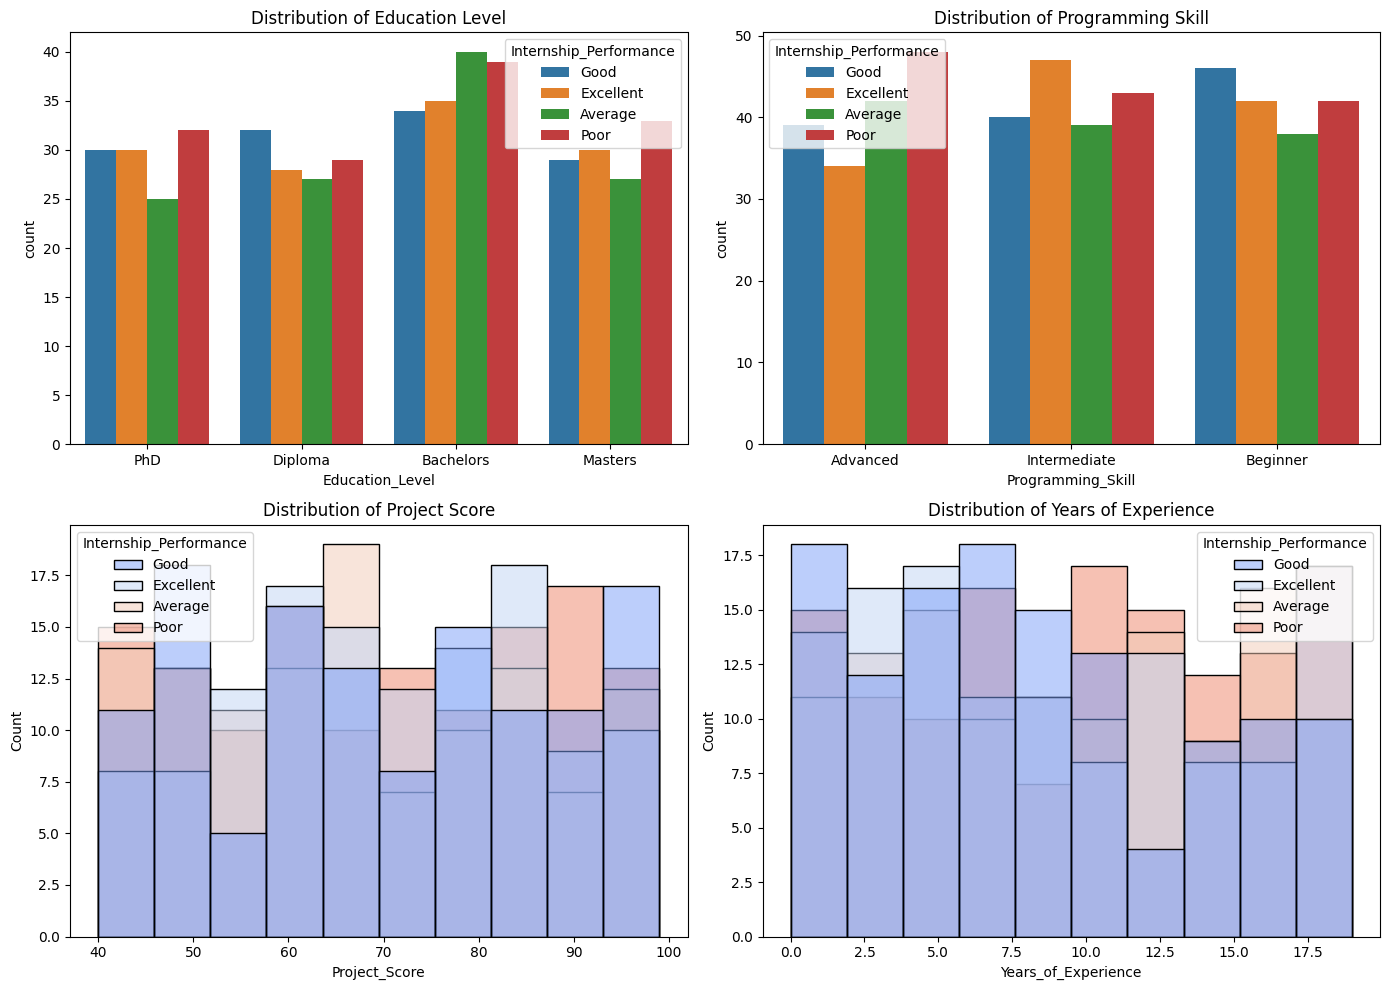

In [19]:
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.countplot(data=df_copy, x="Education_Level", hue="Internship_Performance")
plt.title("Distribution of Education Level")

plt.subplot(2,2,2)
sns.countplot(data=df_copy, x="Programming_Skill", hue="Internship_Performance")
plt.title("Distribution of Programming Skill")

plt.subplot(2,2,3)
sns.histplot(data=df_copy, x="Project_Score", bins=10,hue="Internship_Performance",palette="coolwarm")
plt.title("Distribution of Project Score")

plt.subplot(2,2,4)
sns.histplot(data=df_copy, x="Years_of_Experience", bins=10,hue="Internship_Performance",palette="coolwarm")
plt.title("Distribution of Years of Experience")

plt.tight_layout()
plt.show()

In [20]:
df_copy.drop("Employee_ID",axis=1,inplace=True)
df_copy.head()

,Age,Education_Level,Years_of_Experience,Programming_Skill,Python_Score,ML_Theory_Score,Project_Score,Attendance_Percentage,Internship_Performance
0,26,PhD,7,Advanced,64,98,88,92,Good
1,39,Diploma,3,Intermediate,84,69,71,95,Excellent
2,34,Bachelors,7,Intermediate,90,41,46,77,Good
3,30,Masters,3,Intermediate,97,52,60,96,Excellent
4,27,Masters,2,Advanced,58,76,59,78,Average


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_copy["Years_of_Experience"]=le.fit_transform(df_copy["Years_of_Experience"])
df_copy["Education_Level"]=le.fit_transform(df_copy["Education_Level"])
df_copy["Internship_Performance"]=le.fit_transform(df_copy["Internship_Performance"])
df_copy["Programming_Skill"]=le.fit_transform(df_copy["Programming_Skill"])

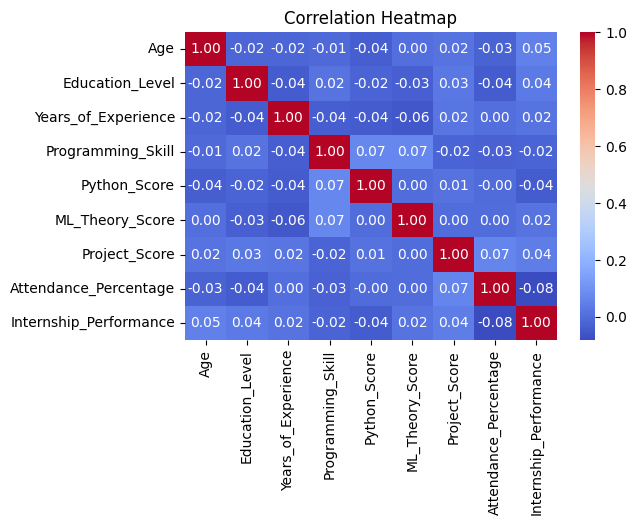

In [22]:
corr=df_copy.corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr,cmap="coolwarm",annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
features=['Age', 'Education_Level', 'Years_of_Experience',
       'Programming_Skill', 'Python_Score', 'ML_Theory_Score', 'Project_Score',
       'Attendance_Percentage']
x=df_copy[features]
y=df_copy["Internship_Performance"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
model.fit(x_train, y_train)
print("Train Accuracy:", model.score(x_train, y_train))
print("Test Accuracy:", model.score(x_test, y_test))
rf_pred=model.predict(x_test)


Train Accuracy: 0.9325
Test Accuracy: 0.28


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.26      0.27      0.27        22
           1       0.34      0.37      0.36        27
           2       0.23      0.23      0.23        26
           3       0.27      0.24      0.26        25

    accuracy                           0.28       100
   macro avg       0.28      0.28      0.28       100
weighted avg       0.28      0.28      0.28       100



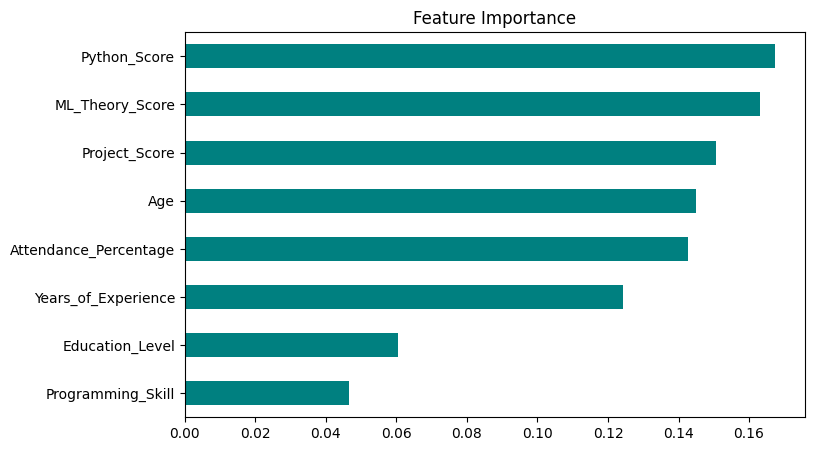

In [26]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=x_train.columns).sort_values(ascending=True)
    
plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(df_copy[features])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LogisticRegression(max_iter=1000,random_state=42,class_weight="balanced")
model.fit(x_train,y_train)
log_predict=model.predict(x_test)
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.35      0.55      0.43        22
           1       0.33      0.33      0.33        27
           2       0.35      0.31      0.33        26
           3       0.19      0.12      0.15        25

    accuracy                           0.32       100
   macro avg       0.31      0.33      0.31       100
weighted avg       0.30      0.32      0.31       100



In [28]:
from sklearn.svm import SVC
svm = SVC(
    kernel='rbf',
    probability=True,
    random_state=42
)
model.fit(x_train,y_train)
svm_pred=model.predict(x_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.35      0.55      0.43        22
           1       0.33      0.33      0.33        27
           2       0.35      0.31      0.33        26
           3       0.19      0.12      0.15        25

    accuracy                           0.32       100
   macro avg       0.31      0.33      0.31       100
weighted avg       0.30      0.32      0.31       100



In [29]:
from xgboost import XGBClassifier
model = XGBClassifier(  n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42,
    eval_metric="logloss"
)
model.fit(x_train,y_train)
xgb_predict=model.predict(x_test)
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.38      0.27      0.32        22
           1       0.23      0.26      0.24        27
           2       0.32      0.35      0.33        26
           3       0.28      0.28      0.28        25

    accuracy                           0.29       100
   macro avg       0.30      0.29      0.29       100
weighted avg       0.30      0.29      0.29       100



In [30]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,
    weights="uniform",
    algorithm="auto",
    leaf_size=30,
    p=2,
    metric="minkowski",
    n_jobs=-1
)
model.fit(x_train,y_train)
knn_predict=model.predict(x_test)
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.17      0.27      0.21        22
           1       0.30      0.33      0.32        27
           2       0.16      0.12      0.13        26
           3       0.38      0.24      0.29        25

    accuracy                           0.24       100
   macro avg       0.25      0.24      0.24       100
weighted avg       0.25      0.24      0.24       100

